### Scaling Preprocessing Task
표정분류  
  
**flow_from_dataframe()을 사용한다.**

In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.densenet import preprocess_input

IMAGE_SIZE = 64
BATCH_SIZE = 64

idg = ImageDataGenerator(preprocessing_function=preprocess_input)

original_dir = './datasets/face/original/'
test_dir = './datasets/face/test/'

original_generator = idg.flow_from_directory(original_dir, 
                                             target_size=(IMAGE_SIZE, IMAGE_SIZE), 
                                             batch_size=BATCH_SIZE, 
                                             class_mode='categorical', 
                                             shuffle=True)

test_generator = idg.flow_from_directory(test_dir, 
                                             target_size=(IMAGE_SIZE, IMAGE_SIZE), 
                                             batch_size=BATCH_SIZE, 
                                             class_mode='categorical')

print(original_generator.class_indices)
print(test_generator.class_indices)

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.
{'angry': 0, 'disgust': 1, 'fear': 2, 'happy': 3, 'neutral': 4, 'sad': 5, 'surprise': 6}
{'angry': 0, 'disgust': 1, 'fear': 2, 'happy': 3, 'neutral': 4, 'sad': 5, 'surprise': 6}


In [3]:
target_name = {v: k for k, v in original_generator.class_indices.items()}
target_name

{0: 'angry',
 1: 'disgust',
 2: 'fear',
 3: 'happy',
 4: 'neutral',
 5: 'sad',
 6: 'surprise'}

In [4]:
original_target_names = []
test_target_names = []

for target in original_generator.classes:
    original_target_names.append(target_name[target])

for target in test_generator.classes:
    test_target_names.append(target_name[target])

print(original_target_names.__len__(), test_target_names.__len__())

28709 7178


In [5]:
import pandas as pd

original_df = pd.DataFrame({'file_paths': original_generator.filepaths, 'target_names': original_target_names, 'targets': original_generator.classes})
original_df.file_paths = original_df.file_paths.apply(lambda file_path: file_path.replace('\\', '/'))

test_df = pd.DataFrame({'file_paths': test_generator.filepaths, 'target_names': test_target_names, 'targets': test_generator.classes})
test_df.file_paths = test_df.file_paths.apply(lambda file_path: file_path.replace('\\', '/'))

display(original_df)
display(test_df)

,file_paths,target_names,targets
0,./datasets/face/original/angry/angry1.png,angry,0
1,./datasets/face/original/angry/angry10.png,angry,0
2,./datasets/face/original/angry/angry100.png,angry,0
3,./datasets/face/original/angry/angry1000.png,angry,0
4,./datasets/face/original/angry/angry1001.png,angry,0
...,...,...,...
28704,./datasets/face/original/surprise/surprise995.png,surprise,6
28705,./datasets/face/original/surprise/surprise996.png,surprise,6
28706,./datasets/face/original/surprise/surprise997.png,surprise,6
28707,./datasets/face/original/surprise/surprise998.png,surprise,6


,file_paths,target_names,targets
0,./datasets/face/test/angry/PrivateTest_1013136...,angry,0
1,./datasets/face/test/angry/PrivateTest_1030447...,angry,0
2,./datasets/face/test/angry/PrivateTest_1054527...,angry,0
3,./datasets/face/test/angry/PrivateTest_1059009...,angry,0
4,./datasets/face/test/angry/PrivateTest_1109992...,angry,0
...,...,...,...
7173,./datasets/face/test/surprise/PublicTest_98089...,surprise,6
7174,./datasets/face/test/surprise/PublicTest_98567...,surprise,6
7175,./datasets/face/test/surprise/PublicTest_98972...,surprise,6
7176,./datasets/face/test/surprise/PublicTest_99242...,surprise,6


In [6]:
from sklearn.model_selection import train_test_split

train_images, validation_images, train_targets, validation_targets = \
train_test_split(original_df.file_paths, 
                 original_df.targets, 
                 stratify=original_df.targets, 
                 test_size=0.2, 
                 random_state=124)

train_df = original_df.iloc[train_images.index].reset_index(drop=True)
validation_df = original_df.iloc[validation_images.index].reset_index(drop=True)

display(train_df)
display(validation_df)

,file_paths,target_names,targets
0,./datasets/face/original/sad/sad4254.png,sad,5
1,./datasets/face/original/sad/sad4586.png,sad,5
2,./datasets/face/original/neutral/neutral1861.png,neutral,4
3,./datasets/face/original/angry/angry3888.png,angry,0
4,./datasets/face/original/sad/sad181.png,sad,5
...,...,...,...
22962,./datasets/face/original/angry/angry3531.png,angry,0
22963,./datasets/face/original/sad/sad848.png,sad,5
22964,./datasets/face/original/happy/happy4192.png,happy,3
22965,./datasets/face/original/surprise/surprise1544...,surprise,6


,file_paths,target_names,targets
0,./datasets/face/original/happy/happy2734.png,happy,3
1,./datasets/face/original/sad/sad891.png,sad,5
2,./datasets/face/original/neutral/neutral2226.png,neutral,4
3,./datasets/face/original/happy/happy3212.png,happy,3
4,./datasets/face/original/neutral/neutral547.png,neutral,4
...,...,...,...
5737,./datasets/face/original/sad/sad3279.png,sad,5
5738,./datasets/face/original/surprise/surprise2269...,surprise,6
5739,./datasets/face/original/fear/fear2433.png,fear,2
5740,./datasets/face/original/happy/happy1986.png,happy,3


In [7]:
import shutil
import os.path

base_dir = './datasets/face/'


for filepath in train_df.file_paths:
    destination = base_dir + 'train/' + filepath[len(base_dir + '/original'):filepath.rindex('/')]
    
    if not os.path.exists(destination):
        os.makedirs(destination)
    shutil.copy2(filepath, destination)

In [8]:
import shutil
import os.path

base_dir = './datasets/face/'


for filepath in validation_df.file_paths:
    destination = base_dir + 'validation/' + filepath[len(base_dir + '/original'):filepath.rindex('/')]
    
    if not os.path.exists(destination):
        os.makedirs(destination)
    shutil.copy2(filepath, destination)

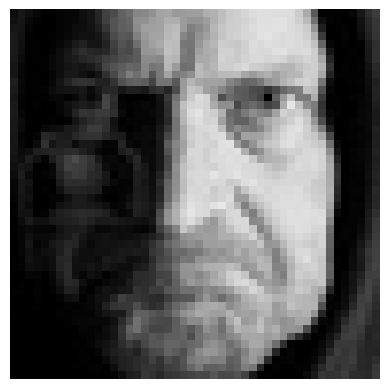

In [9]:
import cv2
import matplotlib.pyplot as plt

image = cv2.cvtColor(cv2.imread(train_df.file_paths.iloc[22962]), cv2.COLOR_BGR2RGB)
plt.imshow(image)
plt.axis('off')
plt.show()

In [10]:
from tensorflow.keras.applications.xception import preprocess_input

IMAGE_SIZE = 224
BATCH_SIZE = 64

train_generator = ImageDataGenerator(horizontal_flip=True, preprocessing_function=preprocess_input)
validation_generator = ImageDataGenerator(preprocessing_function=preprocess_input)
test_generator = ImageDataGenerator(preprocessing_function=preprocess_input)

train_flow = train_generator.flow_from_dataframe(
    dataframe=train_df,
    x_col='file_paths',
    y_col='target_names',
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=True
)

validation_flow = validation_generator.flow_from_dataframe(
    dataframe=validation_df,
    x_col='file_paths',
    y_col='target_names',
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

test_flow = test_generator.flow_from_dataframe(
    dataframe=test_df,
    x_col='file_paths',
    y_col='target_names',
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

print(train_flow.class_indices)
print(validation_flow.class_indices)
print(test_flow.class_indices)

Found 22967 validated image filenames belonging to 7 classes.
Found 5742 validated image filenames belonging to 7 classes.
Found 7178 validated image filenames belonging to 7 classes.
{'angry': 0, 'disgust': 1, 'fear': 2, 'happy': 3, 'neutral': 4, 'sad': 5, 'surprise': 6}
{'angry': 0, 'disgust': 1, 'fear': 2, 'happy': 3, 'neutral': 4, 'sad': 5, 'surprise': 6}
{'angry': 0, 'disgust': 1, 'fear': 2, 'happy': 3, 'neutral': 4, 'sad': 5, 'surprise': 6}


In [11]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense , Conv2D , Dropout , Flatten , Activation, MaxPooling2D , GlobalAveragePooling2D
from tensorflow.keras.layers import BatchNormalization

from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications import ResNet50V2
from tensorflow.keras.applications import Xception

def create_model(model_name='vgg16', verbose=False):
    input_tensor = Input(shape=(IMAGE_SIZE, IMAGE_SIZE, 3))
    if model_name == 'vgg16':
        model = VGG16(input_tensor=input_tensor, include_top=False, weights='imagenet')
    elif model_name == 'resnet50': # ResNet50, 74.9% ; ResNet50V2, 76.0%
        model = ResNet50V2(input_tensor=input_tensor, include_top=False, weights='imagenet')
    elif model_name == 'xception': # Inception을 기초로 한 모델
        model = Xception(input_tensor=input_tensor, include_top=False, weights='imagenet')

    x = model.output

    # 분류기
    x = GlobalAveragePooling2D()(x)
    if model_name != 'vgg16':
        x = Dropout(rate=0.5)(x)
    x = Dense(50, activation='relu')(x)
    if model_name != 'vgg16':
        x = Dropout(rate=0.5)(x)
    output = Dense(7, activation='softmax', name='output')(x)
    
    model = Model(inputs=input_tensor, outputs=output)
    
    if verbose:
        model.summary()
    
    return model

In [12]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy

model = create_model(model_name='xception', verbose=False)
model.compile(optimizer=Adam(), loss=CategoricalCrossentropy(), metrics=['acc'])

In [13]:
import gc
gc.collect()

2536

In [14]:
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping

mcp_cb = ModelCheckpoint(
    filepath="./callback_files/weights.{epoch:03d}-{val_loss:.4f}-{acc:.4f}.weights.h5",
    monitor='val_loss',
    save_best_only=False,
    save_weights_only=True,
    mode='min'
)

rlr_cb = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.1,
    patience=2,
    mode='min'
)

ely_cb = EarlyStopping(
    monitor='val_loss',
    patience=4,
    mode='min'
)

아래쪽은 훈련 돌려서 확인

In [16]:
N_EPOCHS = 10

history = model.fit(train_flow, 
                    batch_size=BATCH_SIZE,
                    epochs=N_EPOCHS, 
                    validation_data=validation_flow,
                    callbacks=[mcp_cb, rlr_cb, ely_cb])

In [17]:
model.evaluate(test_flow)

이미지 확인

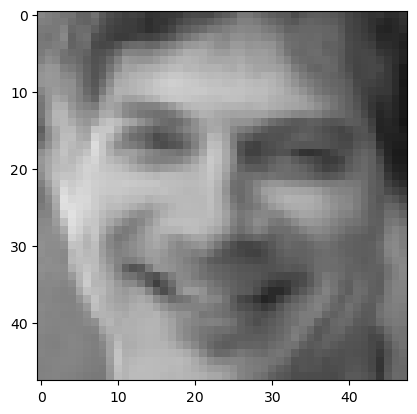

In [18]:
import matplotlib.pyplot as plt

def show_history(history):
    plt.figure(figsize=(6, 6))
    plt.yticks(np.arange(0, 1, 0.05))
    plt.plot(history.history['acc'], label='train')
    plt.plot(history.history['val_acc'], label='validation')
    plt.legend()
    
show_history(history)